# Gráficos en Cuadrícula con seaborn

En este apartado se incluye alguna manipulación de datos inicial que no es relevante para las explicaciones. 
Se puede ignorar esta parte.

In [1]:
import pandas as pd
pd.set_option('max_columns', None)
df = pd.read_csv("./data/FIFA18CompletePlayerDataset.csv", index_col=0)

import re
import numpy as np

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

C:\ProgramData\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


In [3]:
import seaborn as sns

**"Faceting"** es el proceso por el que distribuimos variables de datos a lo largo de varios subplots, generando una figura única.
En lugar de un gráfico (por ejemplo de barras), podemos tener 4 situados en una rejilla.

Veamos como se realiza:

## FacetGrid

La funcionalidad para este tipo de tareas en seaborn es [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html). Se trata de un objeto que almacena información sobre cómo se quiere que se distribuyan los datos en la visualización.

Por ejemplo, imaginemos que se quiere comparar delanteros y porteros de varios equipos de fútbol. Se puede realizar un Facetgrid indicando que se quiere distribuir en funcion de la columna de "Position".

Como ahora solo nos interesan esas dos posiciones, si las indicamos como parámetro de la función `isin()`, de forma que filtra todas aquellas filas que no tengan las posiciones de "ST" (striker en inglés) y "GK" (goal keeper).
La funcion `FacetGrid` entiende que son estas dos columnas por las que queremos dividir los datos, por lo que crea internamente 2 subgráficos.

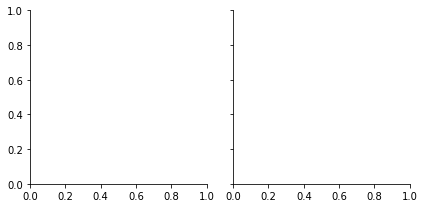

In [4]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])] # De la tabla 'footballers', seleccionamos solo los que tienen como psocion ST y GK
g = sns.FacetGrid(df, col="Position") # Llamando a la funcion con 2 columnas, genera 2 gráficas

Se ha almacenado la referencia creada por `FacetGrid`, que identifica a los ejes en la variable 'g'.
Ahora, con la función `map()` ver [DOC](https://seaborn.pydata.org/generated/seaborn.FacetGrid.map.html#seaborn.FacetGrid.map) simplemente le pasamos como parámetro:
- la funcion con la que queremos que se grafiquen los datos (en este caso el `kdeplot()`)
- la lista con las variables (columnas) a representar ()

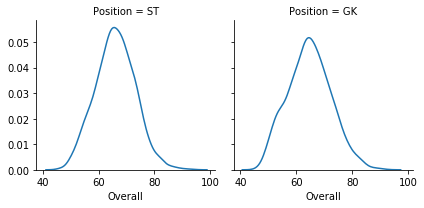

In [5]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
g = sns.FacetGrid(df, col="Position")
g.map(sns.kdeplot, "Overall")

Pasar un método como parámetro de otro método puede resultar algo nuevo para muchos, pero permite simplificar muchas partes del código y es un esquema que se emplea mucho en análisis de datos.

Al emplear un objeto que obtiene los "criterios/necesidades de diseño", permite después relacionar los valores de los datos con su representación, evitando tener que hacerlo nosotros.

Si ahora deseamos comparar todas las posiciones (en lugar de solo delanteros y porteros), podemos hacerlo de forma similar. El parametro `col_wrap` permite indicar cuantas gráficas se pueden incuir en una fila para que sigan resultando legibles.

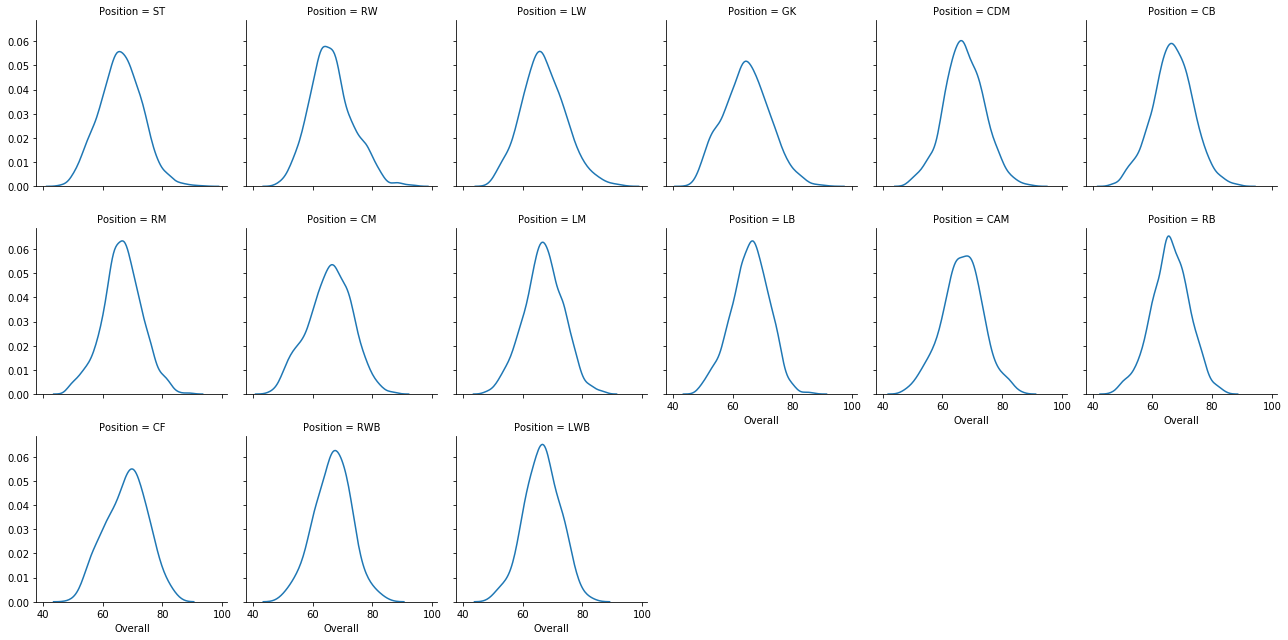

In [6]:
df = footballers

g = sns.FacetGrid(df, col="Position", col_wrap=6)
g.map(sns.kdeplot, "Overall")

También se pueden realizar facetas que incluyan 2 variables por cada cuadro.

Para ello, `FacetGrid` dispone de los parámetros `row` y `col`. 

C:\ProgramData\Anaconda\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


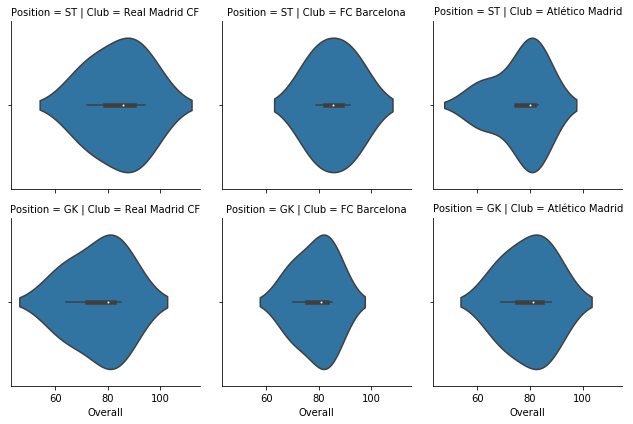

In [7]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])] # De la tabla footballers, se seleccionan solo ST y GK
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])] # De ellos, solo los que pertenencen a uno de los 3 clubs.

g = sns.FacetGrid(df, row="Position", col="Club") # Se genera la cuadrícula de representación
g.map(sns.violinplot, "Overall") # Se solicita un gráfico de violin en cada apartado.

Para indicar que se desean obtener los diferentes gráficos ordenados de alguna forma, se puede añadir el parámetro `row_order` y `col_order`. Si no se especifica, el orden es aleatorio.

C:\ProgramData\Anaconda\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


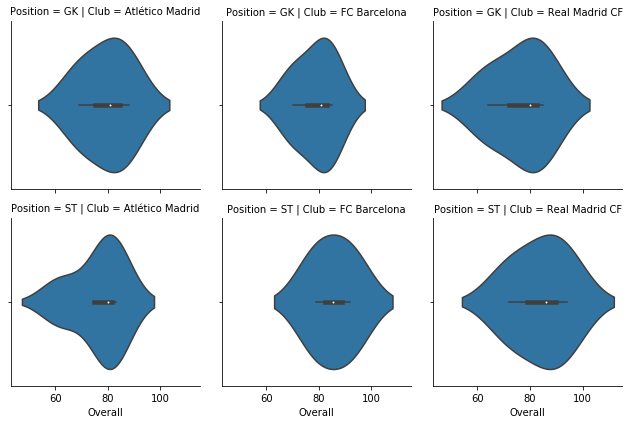

In [8]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df, row="Position", col="Club", 
                  row_order=['GK', 'ST'],
                  col_order=['Atlético Madrid', 'FC Barcelona', 'Real Madrid CF'])
g.map(sns.violinplot, "Overall")

## ¿Por qué usar facet?


En resumen, es la forma más sencilla de representar los datos de forma multivariada.

Estableciendo una variable (categórica) como filas y otra (categorica) como columnas, ya tenemos 2 variables establecidas antes de empezar a representar, aumentando las capacidades de visualización.

Es muy sencillo pasar de representar p.ej. un kdeplot a realizar una rejilla con varios de ellos, al necesitar de muy poco código adicional.

Como desventaja, solo podemos realizar estas operaciones con una o dos variables de tipo categórico y con pocos valores diferentes. Además solo se pueden emplear alrededor de 5 dimensiones en la cuadrícula o los valores se vuelven pequeños e ilegibles (o se necesita emplear mucho scroll).

## Pairplot

La funcion pairplot permite realizar un resumen de lo que haría la función Facetgrid.

Permite representar en cuadrícula todas las variables (y no determinados valores de las variables). Se pasa como parámetro un DataFrame con la forma adecuada y devuelve, generada automáticamente la cuadrícula que presenta la representación de una variable contra el resto.

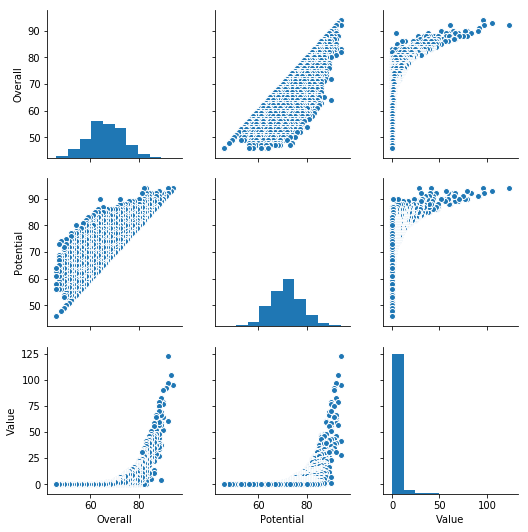

In [9]:
sns.pairplot(footballers[['Overall', 'Potential', 'Value']])

Por defecto, devuelve gráficos de dispersión (scatterplot) de una variable contra la otra y un histograma de esa variable en la diagonal.

Si los datos seleccionados son adecuados para este tipo de gráfico, suele ser uno de los primeros en generarse para cualquier estudio de datos.